 # Machine Learning Assignment

In [2]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn import svm
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

from prettytable import PrettyTable

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
print("Shape of the iris_df is", iris_df.shape)
iris_df.sample(5)

Shape of the iris_df is (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
13,4.3,3.0,1.1,0.1,0
103,6.3,2.9,5.6,1.8,2
72,6.3,2.5,4.9,1.5,1
55,5.7,2.8,4.5,1.3,1
115,6.4,3.2,5.3,2.3,2


# Visualizations on Iris dataset

In [4]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


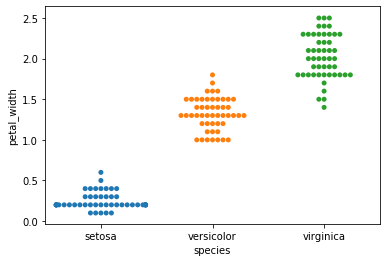

In [5]:
sns.swarmplot(x= 'species',y = 'petal_width',data = iris)

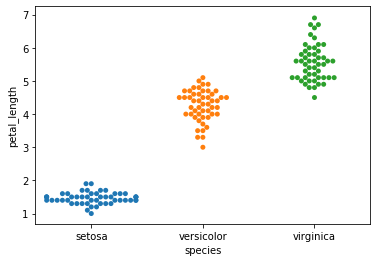

In [6]:
sns.swarmplot(x= 'species',y = 'petal_length',data = iris)

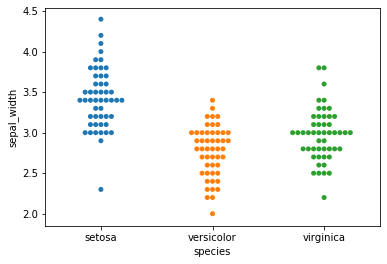

In [7]:
sns.swarmplot(x= 'species',y = 'sepal_width',data = iris)

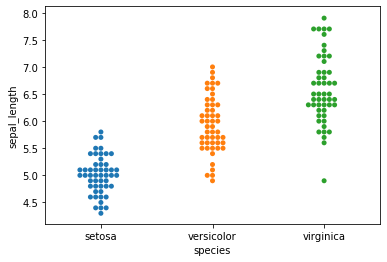

In [8]:
sns.swarmplot(x= 'species',y = 'sepal_length',data = iris)

In [9]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Spliting the Iris dataset into training and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision tree with max-depth = 5

accuracy score: 91.11
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          16         |            0            |           0            |
| versicolor |          0          |            14           |           1            |
| virginica  |          0          |            3            |           11           |
+------------+---------------------+-------------------------+------------------------+


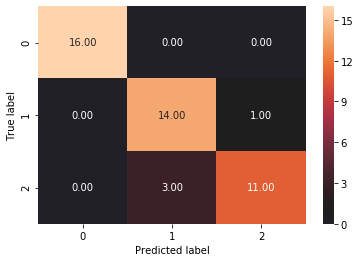

In [10]:
clfdt = DecisionTreeClassifier(max_depth=5)
modeldt = clfdt.fit(X_train, y_train)
y_preddt = modeldt.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_preddt)*100))

matrixdt = confusion_matrix(y_test, y_preddt)
x1 = PrettyTable()
x1.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x1.add_row(['setosa',matrixdt[0][0],matrixdt[0][1],matrixdt[0][2]])
x1.add_row(['versicolor',matrixdt[1][0],matrixdt[1][1],matrixdt[1][2]])
x1.add_row(['virginica',matrixdt[2][0],matrixdt[2][1],matrixdt[2][2]])
print(x1)
sns.heatmap(matrixdt,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

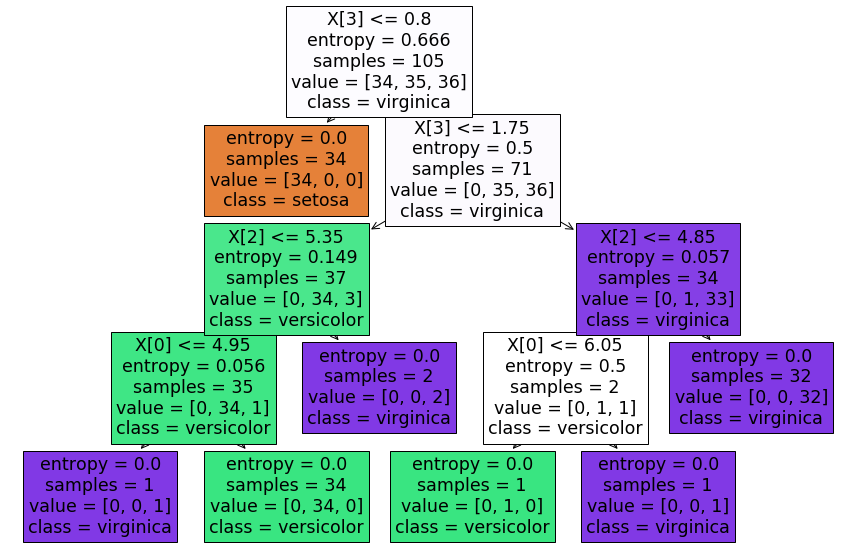

In [11]:
plt.figure(figsize=(15,10))
plot_tree(modeldt, filled=True, class_names=['setosa', 'versicolor', 'virginica'])
plt.show()

# RandomForest and Extremly Randomised Trees on Iris data

accuracy score: 95.56
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          16         |            0            |           0            |
| versicolor |          0          |            15           |           0            |
| virginica  |          0          |            2            |           12           |
+------------+---------------------+-------------------------+------------------------+


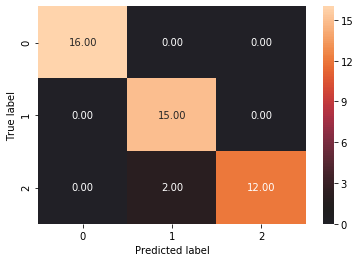

In [12]:
clfrf = RandomForestClassifier(n_estimators=100)
modelrf = clfrf.fit(X_train, y_train)
y_predrf = modelrf.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_predrf)*100))

matrixrf = confusion_matrix(y_test, y_predrf)
x2 = PrettyTable()
x2.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x2.add_row(['setosa',matrixrf[0][0],matrixrf[0][1],matrixrf[0][2]])
x2.add_row(['versicolor',matrixrf[1][0],matrixrf[1][1],matrixrf[1][2]])
x2.add_row(['virginica',matrixrf[2][0],matrixrf[2][1],matrixrf[2][2]])
print(x2)
sns.heatmap(matrixrf,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

accuracy score: 95.56
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          16         |            0            |           0            |
| versicolor |          0          |            15           |           0            |
| virginica  |          0          |            2            |           12           |
+------------+---------------------+-------------------------+------------------------+


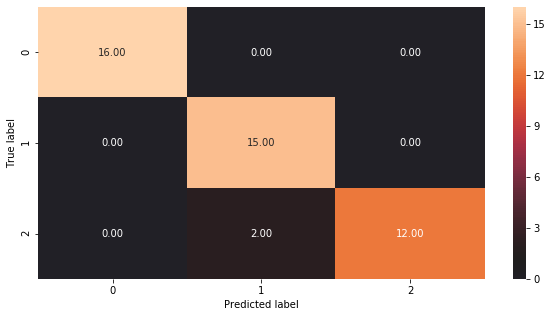

In [13]:
clfert = ExtraTreesClassifier(n_estimators=100)
modelert = clfert.fit(X_train, y_train)
y_predert = modelert.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_predert)*100))

matrixert = confusion_matrix(y_test, y_predert)
x2 = PrettyTable()
x2.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x2.add_row(['setosa',matrixert[0][0],matrixert[0][1],matrixert[0][2]])
x2.add_row(['versicolor',matrixert[1][0],matrixert[1][1],matrixert[1][2]])
x2.add_row(['virginica',matrixert[2][0],matrixert[2][1],matrixert[2][2]])
print(x2)
plt.figure(figsize=(10,5))
sns.heatmap(matrixert,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# RandomForest and Extremly Randomised Trees on DT_dataset

In [15]:
DT_dataset = pd.read_csv('DT_dataset.csv')
DT_data = DT_dataset.drop(['actual','week'], axis=1)
DT_target = DT_dataset['actual']

X_train1, X_test1, y_train1, y_test1 = train_test_split(DT_data, DT_target, test_size=0.3)

accuracy score: 4.76
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


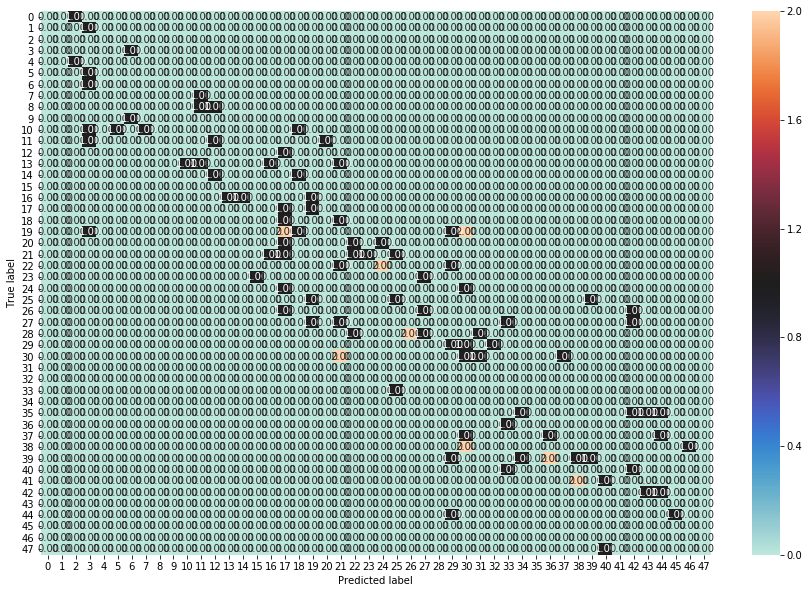

In [16]:
clf2 = RandomForestClassifier(n_estimators=100)
model2 = clf2.fit(X_train1, y_train1)
y_pred2 = model2.predict(X_test1)
print("accuracy score: %.2f"%(accuracy_score(y_test1, y_pred2)*100))

matrix2 = confusion_matrix(y_test1, y_pred2)
print(matrix2)
plt.figure(figsize=(15,10))
sns.heatmap(matrix2,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

accuracy score: 5.71
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


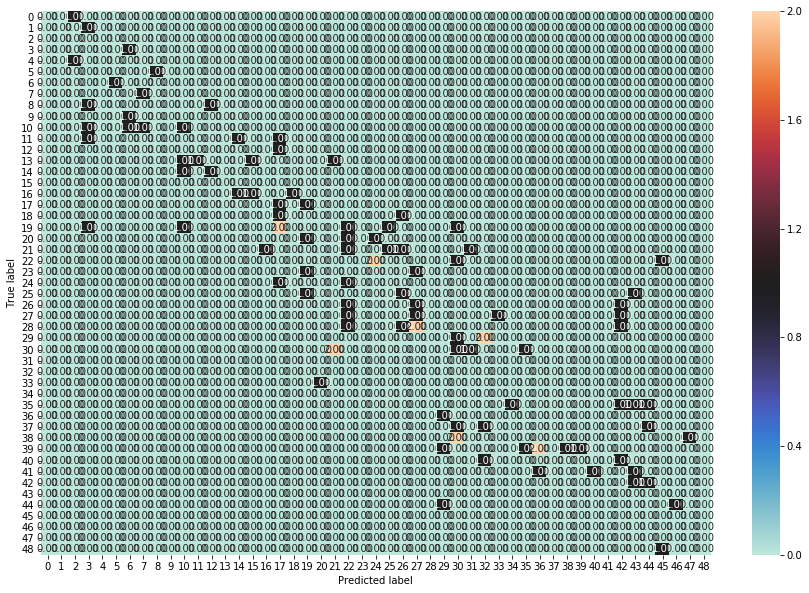

In [17]:
clf3 = ExtraTreesClassifier(n_estimators=100)
model3 = clf3.fit(X_train1, y_train1)
y_pred3 = model3.predict(X_test1)
print("accuracy score: %.2f"%(accuracy_score(y_test1, y_pred3)*100))

matrix3 = confusion_matrix(y_test1, y_pred3)
print(matrix3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix3,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Authors:

Shravanthi Arvind Patil

Sreenivasa Hikkal Venugopala